# Vortex-source panel method

## A lifting-body panel method

### The Kutta condition

lift always requires circulation

### Discretization into panels

In [5]:
%run resources/resources.ipynb

In [6]:
# load geometry data file
naca_filepath = os.path.join('resources', 'naca0012.dat')
with open(naca_filepath, 'r') as infile:
    x, y = np.loadtxt(infile, dtype=float, unpack=True)

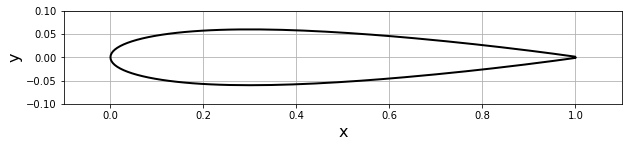

In [7]:
# plot geometry
width = 10
plt.figure(figsize=(width, width))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, linewidth=2, color='k', linestyle='-')
plt.axis('scaled', adjustable='box')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 0.1);

In [9]:
# discretize geometry
panels = define_panels(x, y, N=40)

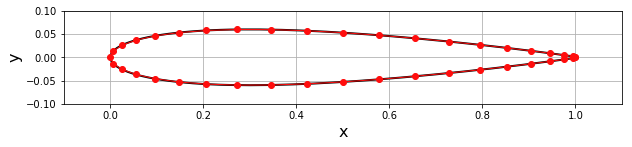

In [10]:
# plot discretized geometry
width = 10
plt.figure(figsize=(width, width))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, linewidth=2, color='k', linestyle='-')
plt.plot(np.append([panel.xa for panel in panels], panels[0].xa),
         np.append([panel.ya for panel in panels], panels[0].ya),
         linestyle='-', linewidth=1, marker='o', markersize=6, color='#FF0D0D')
plt.axis('scaled', adjustable='box')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 0.1);

### Free stream conditions

In [11]:
fs = Freestream()

### Flow tangency boundary condition

A constant vortex strength $\gamma$ will be added to each panel. Thus:

$$\begin{align*}
\phi\left(x_{c_i}, y_{c_i}\right) &= V_\infty x_{c_i}\cos\alpha + V_\infty y_{c_i}\sin\alpha\\ 
&+ \sum_{j=1}^{N}\frac{\sigma_j}{2\pi}\int\ln\left(\sqrt{\left(x_{c_i} - x_j\left(s_j\right)\right)^2 + \left(y_{c_i} - y_j\left(s_j\right)\right)^2}\right)ds_j\\ 
&- \sum_{j=1}^{N}\frac{\gamma}{2\pi}\int\tan^{-1}\left(\frac{y_{c_i} - y_j\left(s_j\right)}{x_{c_i} - x_j\left(s_j\right)}\right)ds_j
\end{align*}$$

The flow tangency boundary condition is applied at every panel center:

$$0 = \vec{V}\cdot\vec{n_i} = \frac{\partial}{\partial n_i}\left\lbrace\phi\left(x_{c_i}, y_{c_i}\right)\right\rbrace$$

i.e.

$$
\begin{align*}
0 &= V_\infty \cos \left(\alpha-\beta_i\right) + \frac{\sigma_i}{2} \\
&+ \sum_{j=1,j\neq i}^N \frac{\sigma_j}{2\pi} \int_j \frac{\partial}{\partial n_i} \ln \left(\sqrt{(x_{c_i}-x_j(s_j))^2+(y_{c_i}-y_j(s_j))^2} \right) {\rm d}s_j \\
&- \sum_{j=1,j\neq i}^N \frac{\gamma}{2\pi} \int_j \frac{\partial}{\partial n_i} \tan^{-1} \left(\frac{y_{c_i}-y_j(s_j)}{x_{c_i}-x_j(s_j)}\right) {\rm d}s_j
\end{align*}
$$

We already worked the first integral in the previous lesson:

$$\frac{\partial}{\partial n_i} \ln \left(\sqrt{(x_{c_i}-x_j(s_j))^2+(y_{c_i}-y_j(s_j))^2} \right) = \frac{\left(x_{c_i}-x_j\right)\frac{\partial x_{c_i}}{\partial n_i} + \left(y_{c_i}-y_j\right)\frac{\partial y_{c_i}}{\partial n_i}}{\left(x_{c_i}-x_j\right)^2 + \left(y_{c_i}-y_j\right)^2}$$

where $\frac{\partial x_{c_i}}{\partial n_i} = \cos \beta_i$ and $\frac{\partial y_{c_i}}{\partial n_i} = \sin \beta_i$, and

$$x_j(s_j) = x_{b_j} - s_j \sin \beta_j$$

$$y_j(s_j) = y_{b_j} + s_j \cos \beta_j$$

We now need to derive the last integral of the boundary equation:

$$\frac{\partial}{\partial n_i} \tan^{-1} \left(\frac{y_{c_i}-y_j(s_j)}{x_{c_i}-x_j(s_j)}\right)= \frac{\left(x_{c_i}-x_j\right)\frac{\partial y_{c_i}}{\partial n_i} - \left(y_{c_i}-y_j\right)\frac{\partial x_{c_i}}{\partial n_i}}{\left(x_{c_i}-x_j\right)^2 + \left(y_{c_i}-y_j\right)^2}$$

where $\frac{\partial x_{c_i}}{\partial n_i} = \cos \beta_i$ and $\frac{\partial y_{c_i}}{\partial n_i} = \sin \beta_i$.

### Enforcing the Kutta condition

$$C_{p_1} = C_{p_N}$$

$$\Rightarrow V_1^2 = V_N^2$$

$$\Rightarrow V_{t_i} = -V_{t_N}$$